In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [20]:
data = pd.read_csv('greenbuildings.csv')
data[:10]
data.columns
#data.isna().sum()
#data.describe()

Index(['CS_PropertyID', 'cluster', 'size', 'empl_gr', 'Rent', 'leasing_rate',
       'stories', 'age', 'renovated', 'class_a', 'class_b', 'LEED',
       'Energystar', 'green_rating', 'net', 'amenities', 'cd_total_07',
       'hd_total07', 'total_dd_07', 'Precipitation', 'Gas_Costs',
       'Electricity_Costs', 'cluster_rent'],
      dtype='object')

In [10]:
data[:10]

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
5,94765,1,231633,2.22,43.16,92.74,14,20,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
6,236739,6,210038,4.01,12.50,94.33,11,38,0,0,...,1,0,1,2746,1670,4416,25.55,0.010100,0.028900,17.50
7,234578,6,225895,4.01,14.77,91.02,15,24,0,1,...,0,0,1,2746,1670,4416,25.55,0.010118,0.028869,17.50
8,42087,6,912011,4.01,17.00,99.32,31,34,0,1,...,0,0,1,2746,1670,4416,25.55,0.010118,0.028869,17.50
9,233989,6,518578,4.01,17.00,93.54,21,36,1,1,...,0,0,1,2746,1670,4416,25.55,0.010118,0.028869,17.50


In [11]:
low_occupancy_threshold = 10  # 10% occupancy rate
data_refined = data[data['leasing_rate'] >= low_occupancy_threshold]

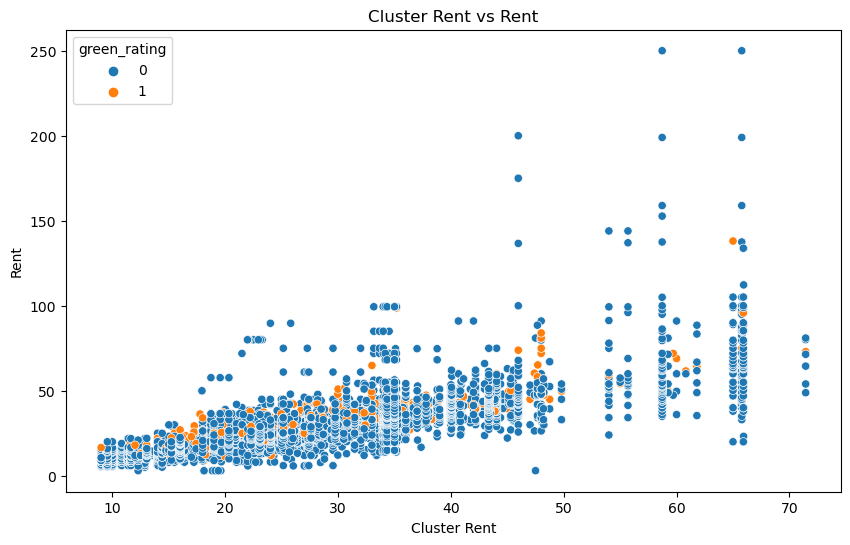

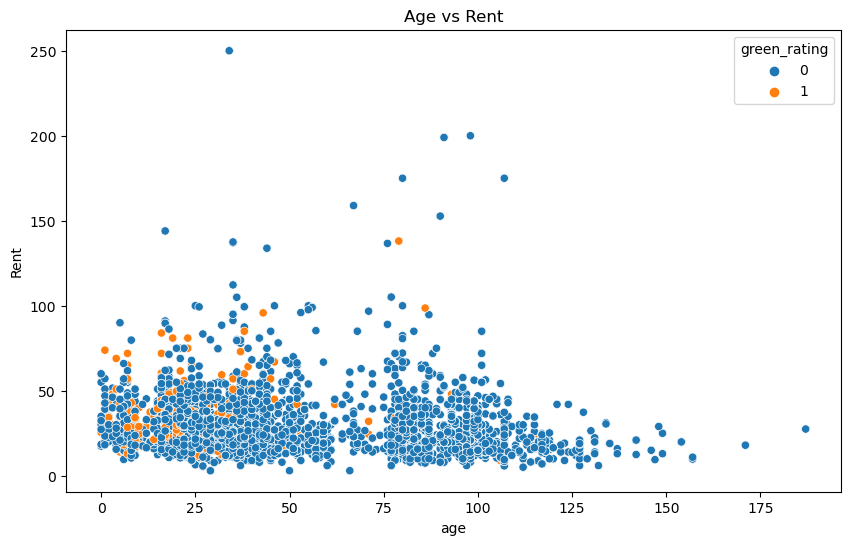

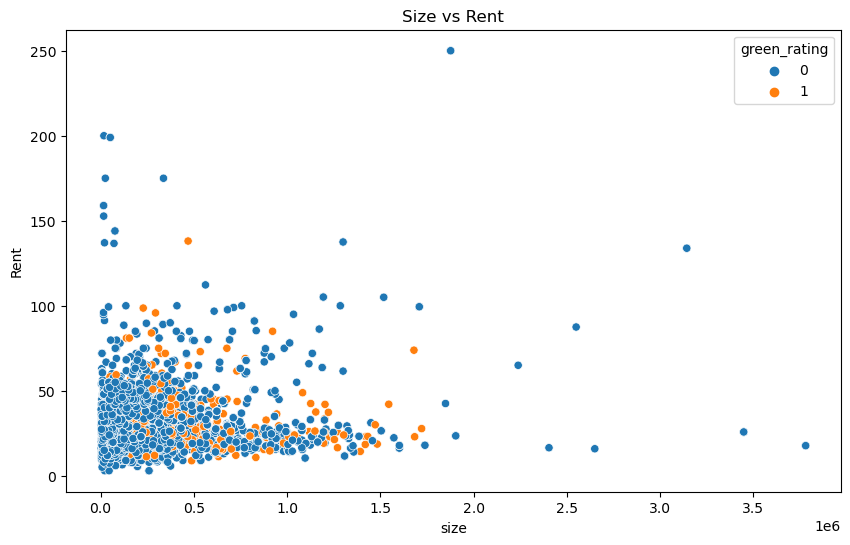

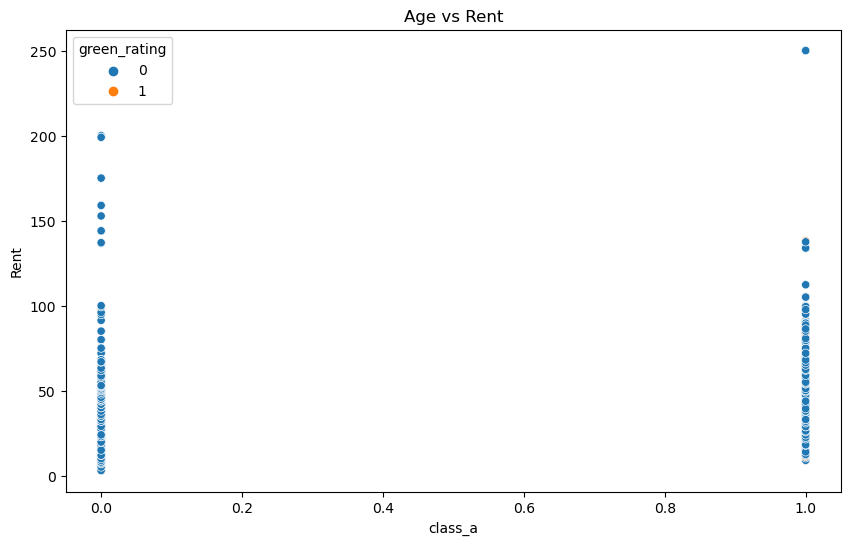

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_refined, x='cluster_rent', y='Rent', hue='green_rating')
plt.xlabel('Cluster Rent')
plt.ylabel('Rent')
plt.title('Cluster Rent vs Rent')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_refined, x='age', y='Rent', hue='green_rating')
plt.xlabel('age')
plt.ylabel('Rent')
plt.title('Age vs Rent')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_refined, x='size', y='Rent', hue='green_rating')
plt.xlabel('size')
plt.ylabel('Rent')
plt.title('Size vs Rent')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_refined, x='class_a', y='Rent', hue='green_rating')
plt.xlabel('class_a')
plt.ylabel('Rent')
plt.title('Age vs Rent')
plt.show()

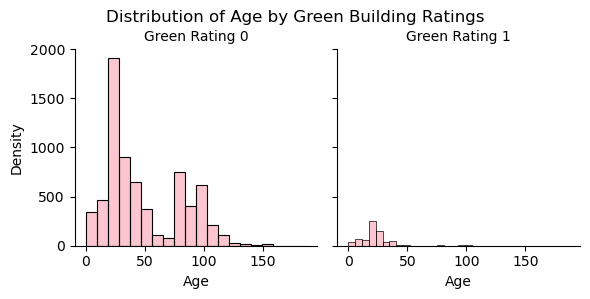

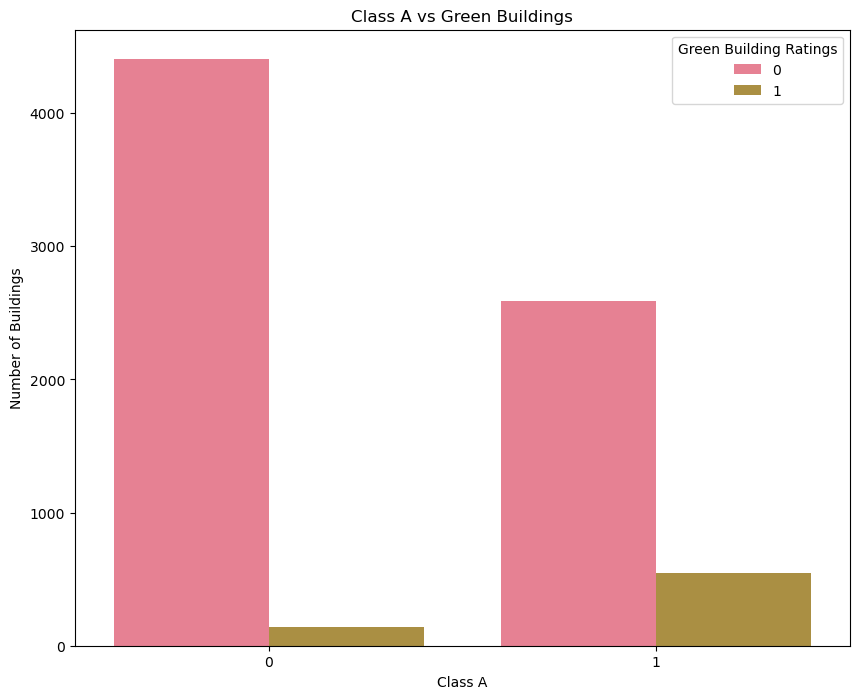

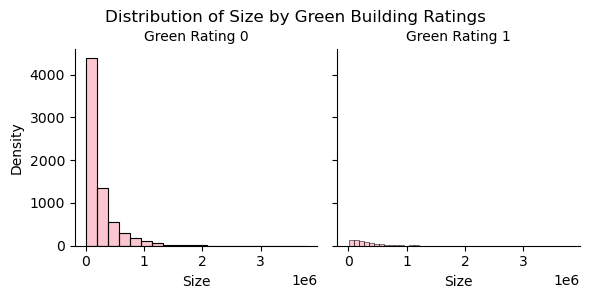

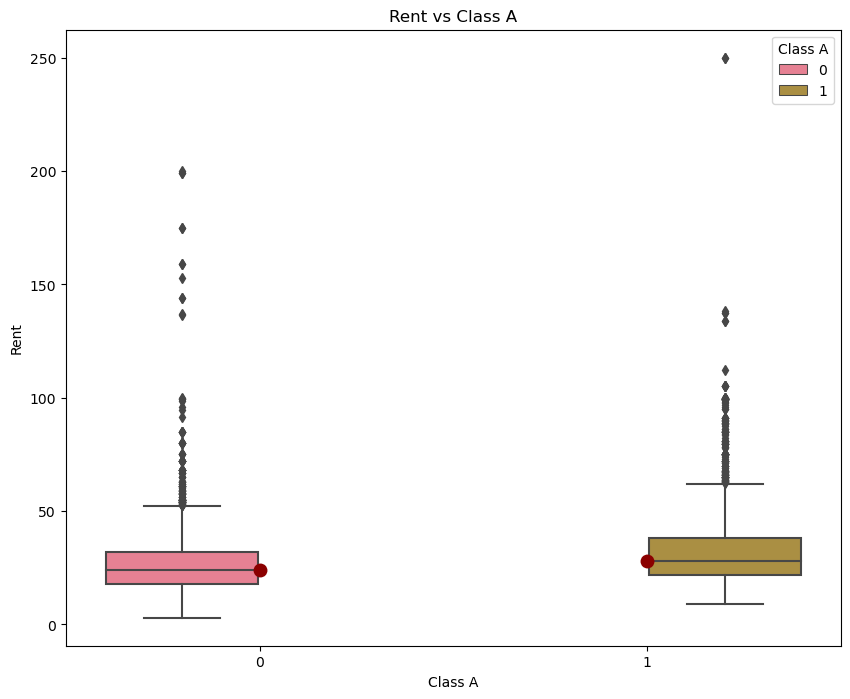

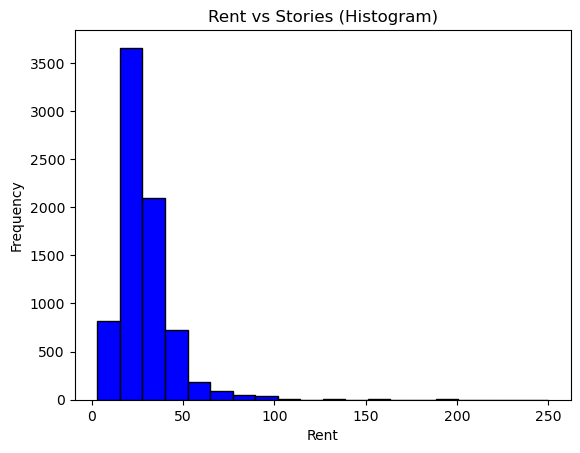

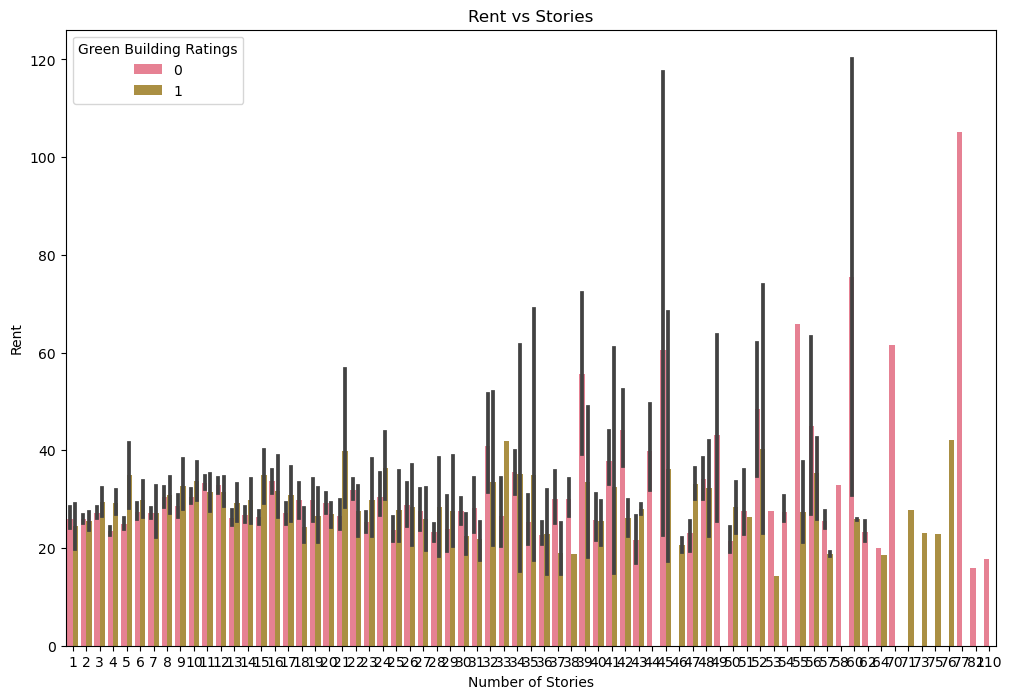

In [16]:
sns.set_palette("husl")
g = sns.FacetGrid(data_refined, col='green_rating')
g.map(sns.histplot, 'age', bins=20, alpha=0.4)
g.set_axis_labels("Age", "Density")
g.set_titles(col_template="Green Rating {col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Age by Green Building Ratings')
plt.show()

plt.figure(figsize=(10, 8))
sns.countplot(data=data_refined, x='class_a', hue='green_rating', dodge=True)
plt.xlabel('Class A')
plt.ylabel('Number of Buildings')
plt.title('Class A vs Green Buildings')
plt.legend(title='Green Building Ratings')
plt.show()

g = sns.FacetGrid(data_refined, col='green_rating')
g.map(sns.histplot, 'size', bins=20, alpha=0.4)
g.set_axis_labels("Size", "Density")
g.set_titles(col_template="Green Rating {col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Size by Green Building Ratings')
plt.show()

medians = data_refined.groupby('class_a')['Rent'].median().reset_index()
plt.figure(figsize=(10, 8))
sns.boxplot(data=data_refined, x='class_a', y='Rent', hue='class_a')
sns.stripplot(data=medians, x='class_a', y='Rent', color='darkred', marker='o', size=10, linewidth=0)
plt.xlabel('Class A')
plt.ylabel('Rent')
plt.title('Rent vs Class A')
plt.legend(title='Class A', loc='upper right')
plt.show()

plt.hist(data_refined[data_refined['Rent'] < 5000]['Rent'].dropna(), bins=20, color='blue', edgecolor='black')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.title('Rent vs Stories (Histogram)')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='stories', y='Rent', hue='green_rating', data=data_refined)
plt.xlabel('Number of Stories')
plt.ylabel('Rent')
plt.title('Rent vs Stories')
plt.legend(title='Green Building Ratings')
plt.show()

/var/folders/_7/f6n3lsw53wj5tt_8skbqmzmh0000gn/T/ipykernel_65037/2673992429.py:3: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  g_age_density = sns.displot(data_refined, x='age', hue='green_rating', element='step', fill=True, alpha=0.4, palette=custom_palette)


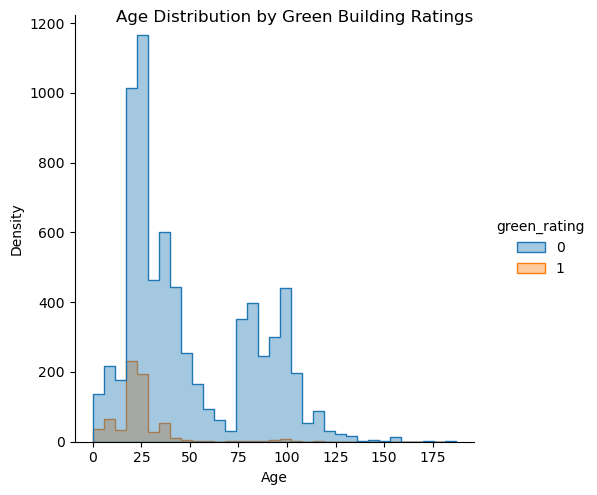

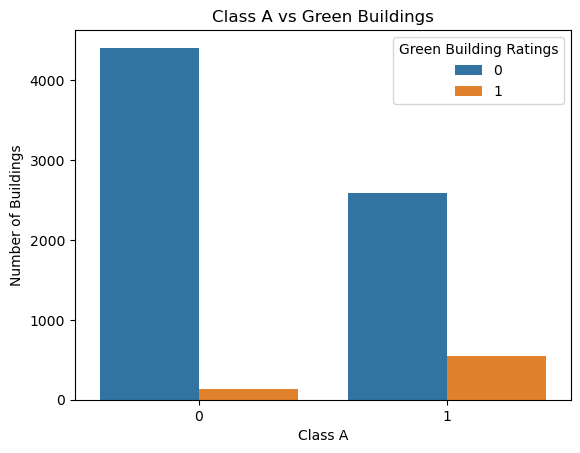

/var/folders/_7/f6n3lsw53wj5tt_8skbqmzmh0000gn/T/ipykernel_65037/2673992429.py:16: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  g_size_density = sns.displot(data_refined, x='size', hue='green_rating', element='step', fill=True, alpha=0.4, palette=custom_palette)


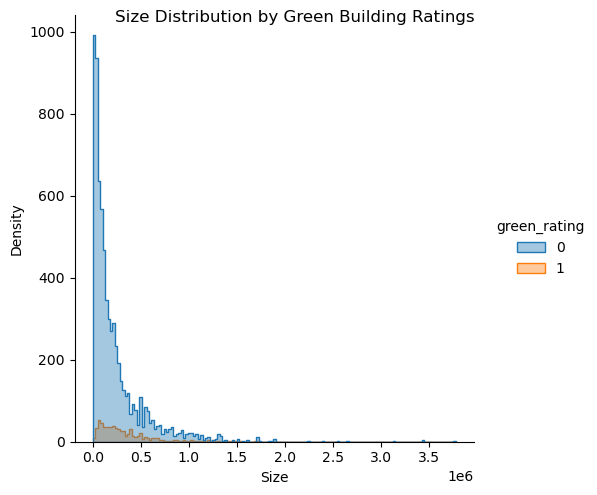

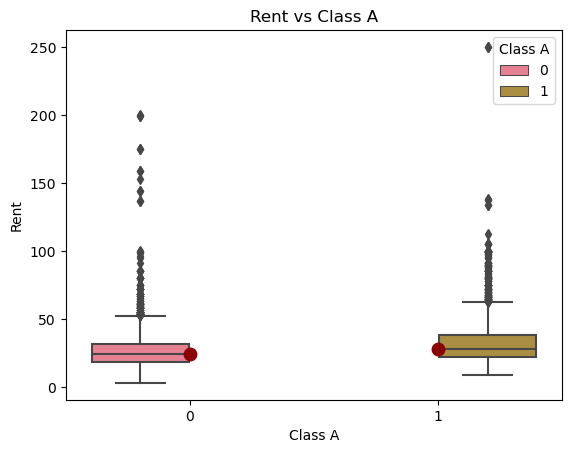

/var/folders/_7/f6n3lsw53wj5tt_8skbqmzmh0000gn/T/ipykernel_65037/2673992429.py:31: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  hist_rent_vs_stories = sns.histplot(data_refined, x='stories', hue='green_rating', bins=20, element='step', fill=True, alpha=0.4, palette=custom_palette)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


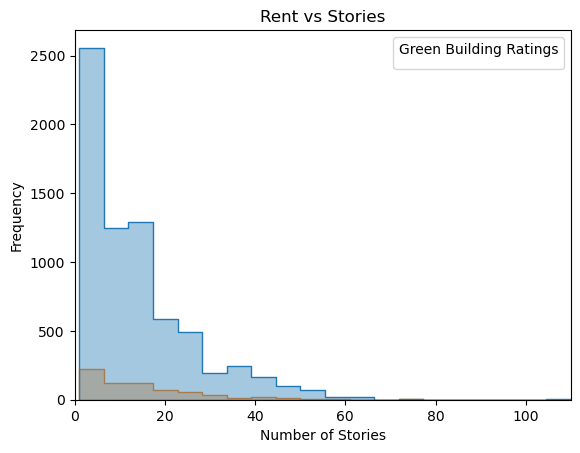

In [19]:
custom_palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

g_age_density = sns.displot(data_refined, x='age', hue='green_rating', element='step', fill=True, alpha=0.4, palette=custom_palette)
g_age_density.set_axis_labels("Age", "Density")
g_age_density.set_titles("Green Building Ratings: {col_name}")
g_age_density.fig.suptitle('Age Distribution by Green Building Ratings')
plt.show()

bar_class_a = sns.countplot(data=data_refined, x='class_a', hue='green_rating', dodge=True, palette=custom_palette)
bar_class_a.set_xlabel('Class A')
bar_class_a.set_ylabel('Number of Buildings')
bar_class_a.set_title('Class A vs Green Buildings')
plt.legend(title='Green Building Ratings')
plt.show()

g_size_density = sns.displot(data_refined, x='size', hue='green_rating', element='step', fill=True, alpha=0.4, palette=custom_palette)
g_size_density.set_axis_labels("Size", "Density")
g_size_density.set_titles("Green Building Ratings: {col_name}")
g_size_density.fig.suptitle('Size Distribution by Green Building Ratings')
plt.show()

medians = data_refined.groupby('class_a')['Rent'].median().reset_index()
boxplot_rent_class_a = sns.boxplot(data=data_refined, x='class_a', y='Rent', hue='class_a')
sns.stripplot(data=medians, x='class_a', y='Rent', color='darkred', marker='o', size=10, linewidth=0)
boxplot_rent_class_a.set_xlabel('Class A')
boxplot_rent_class_a.set_ylabel('Rent')
boxplot_rent_class_a.set_title('Rent vs Class A')
plt.legend(title='Class A', loc='upper right')
plt.show()

hist_rent_vs_stories = sns.histplot(data_refined, x='stories', hue='green_rating', bins=20, element='step', fill=True, alpha=0.4, palette=custom_palette)
hist_rent_vs_stories.set_xlabel('Number of Stories')
hist_rent_vs_stories.set_ylabel('Frequency')
hist_rent_vs_stories.set_title('Rent vs Stories')
hist_rent_vs_stories.set_xlim(0, data_refined['stories'].max())
plt.legend(title='Green Building Ratings')
plt.show()

/var/folders/_7/f6n3lsw53wj5tt_8skbqmzmh0000gn/T/ipykernel_65037/3501511021.py:5: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(data=median_age, x='age_cat', y='Rent', hue='green_rating', palette=custom_palette)


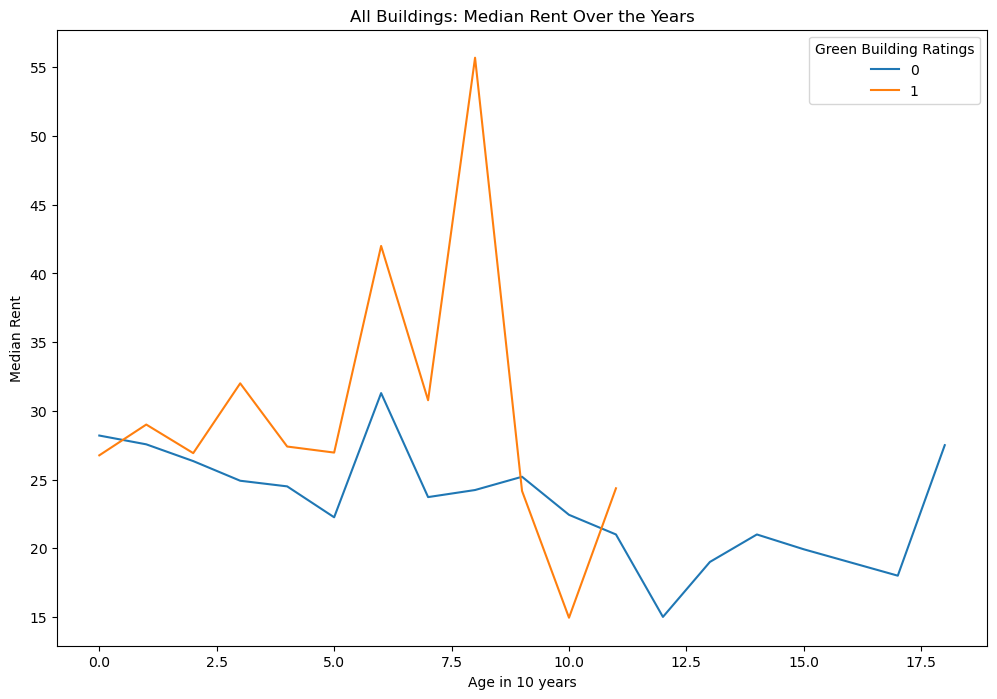

/var/folders/_7/f6n3lsw53wj5tt_8skbqmzmh0000gn/T/ipykernel_65037/3501511021.py:16: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(data=median_size, x='size_cat', y='Rent', hue='green_rating', palette=custom_palette)


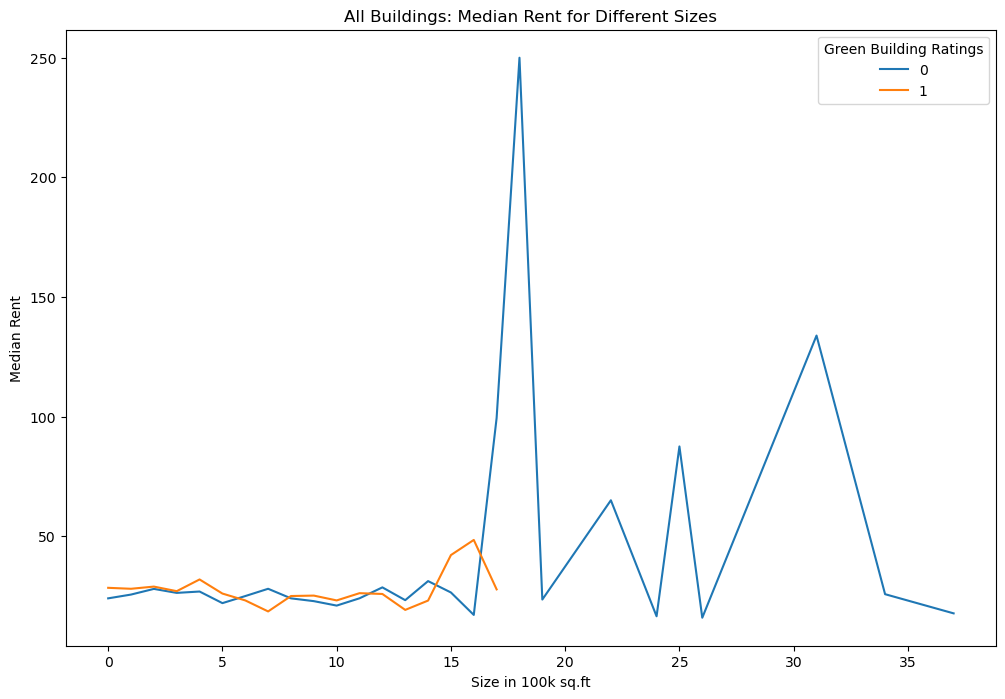

/var/folders/_7/f6n3lsw53wj5tt_8skbqmzmh0000gn/T/ipykernel_65037/3501511021.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_non_class_a['age_cat'] = pd.cut(data_non_class_a['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190], labels=False)
/var/folders/_7/f6n3lsw53wj5tt_8skbqmzmh0000gn/T/ipykernel_65037/3501511021.py:28: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(data=median_age_non_class_a, x='age_cat', y='Rent', hue='green_rating', palette=custom_palette)


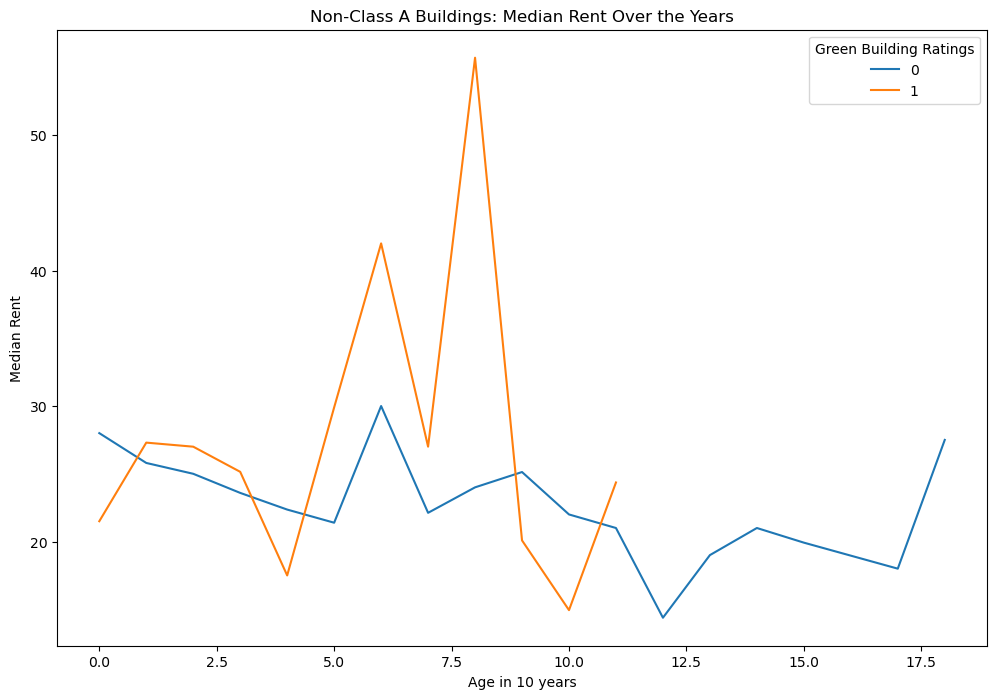

/var/folders/_7/f6n3lsw53wj5tt_8skbqmzmh0000gn/T/ipykernel_65037/3501511021.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_non_class_a['size_cat'] = pd.cut(data_non_class_a['size'], bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000, 2100000, 2200000, 2300000, 2400000, 2500000, 2600000, 2700000, 2800000, 2900000, 3000000, 3100000, 3200000, 3300000, 3400000, 3500000, 3600000, 3700000, 3800000], labels=False)
/var/folders/_7/f6n3lsw53wj5tt_8skbqmzmh0000gn/T/ipykernel_65037/3501511021.py:39: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  sns.lineplot(data=median_si

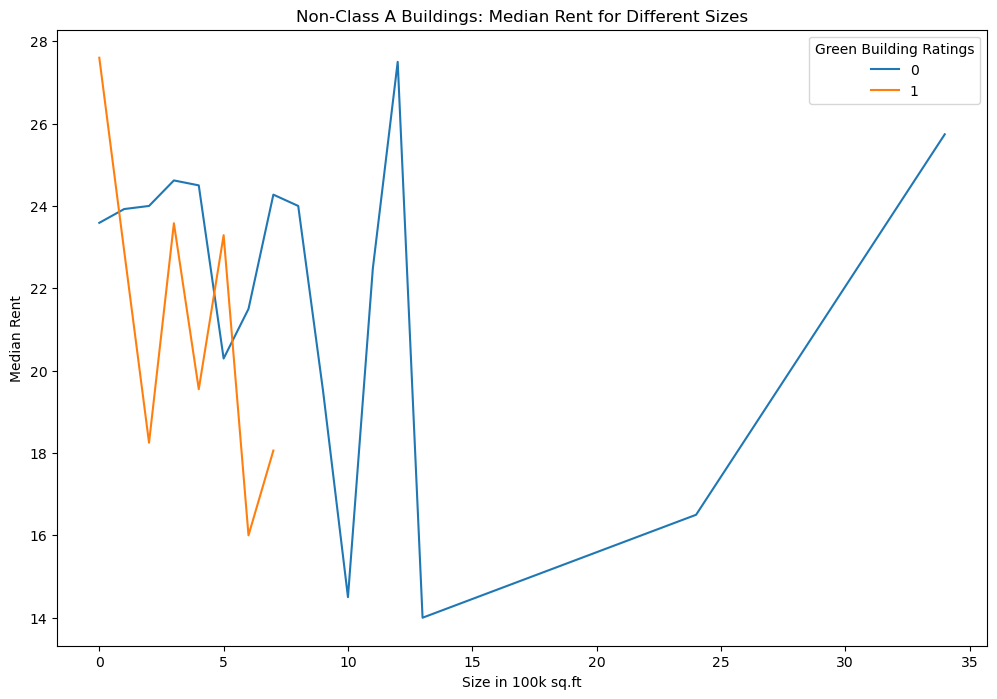

In [22]:
data_refined['age_cat'] = pd.cut(data_refined['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190], labels=False)
median_age = data_refined.groupby(['age_cat', 'green_rating'])['Rent'].median().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=median_age, x='age_cat', y='Rent', hue='green_rating', palette=custom_palette)
plt.xlabel('Age in 10 years')
plt.ylabel('Median Rent')
plt.title('All Buildings: Median Rent Over the Years')
plt.legend(title='Green Building Ratings')
plt.show()

data_refined['size_cat'] = pd.cut(data_refined['size'], bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000, 2100000, 2200000, 2300000, 2400000, 2500000, 2600000, 2700000, 2800000, 2900000, 3000000, 3100000, 3200000, 3300000, 3400000, 3500000, 3600000, 3700000, 3800000], labels=False)
median_size = data_refined.groupby(['size_cat', 'green_rating'])['Rent'].median().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=median_size, x='size_cat', y='Rent', hue='green_rating', palette=custom_palette)
plt.xlabel('Size in 100k sq.ft')
plt.ylabel('Median Rent')
plt.title('All Buildings: Median Rent for Different Sizes')
plt.legend(title='Green Building Ratings')
plt.show()

data_non_class_a = data_refined[data_refined['class_a'] != 1]
data_non_class_a['age_cat'] = pd.cut(data_non_class_a['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190], labels=False)
median_age_non_class_a = data_non_class_a.groupby(['age_cat', 'green_rating'])['Rent'].median().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=median_age_non_class_a, x='age_cat', y='Rent', hue='green_rating', palette=custom_palette)
plt.xlabel('Age in 10 years')
plt.ylabel('Median Rent')
plt.title('Non-Class A Buildings: Median Rent Over the Years')
plt.legend(title='Green Building Ratings')
plt.show()

data_non_class_a['size_cat'] = pd.cut(data_non_class_a['size'], bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000, 2000000, 2100000, 2200000, 2300000, 2400000, 2500000, 2600000, 2700000, 2800000, 2900000, 3000000, 3100000, 3200000, 3300000, 3400000, 3500000, 3600000, 3700000, 3800000], labels=False)
median_size_non_class_a = data_non_class_a.groupby(['size_cat', 'green_rating'])['Rent'].median().reset_index()

plt.figure(figsize=(12, 8))
sns.lineplot(data=median_size_non_class_a, x='size_cat', y='Rent', hue='green_rating', palette=custom_palette)
plt.xlabel('Size in 100k sq.ft')
plt.ylabel('Median Rent')
plt.title('Non-Class A Buildings: Median Rent for Different Sizes')
plt.legend(title='Green Building Ratings')
plt.show()

In [24]:
data_size_class_a = data_refined[(data_refined['size'] > 200000) & (data_refined['size'] < 300000) & (data_refined['class_a'] == 1)]
median_leasing_rate_class_a = data_size_class_a['leasing_rate'].median()

median_class_a = data_size_class_a.groupby(['age_cat', 'green_rating'])['Rent'].median().reset_index()
rent_class_a_green = median_class_a[median_class_a['green_rating'] == 1].sort_values(by='age_cat')['Rent'][:5]
rent_class_a_non_green = median_class_a[median_class_a['green_rating'] == 0].sort_values(by='age_cat')['Rent'][:5]
diff_rent_class_a_first_5_years = ((rent_class_a_green.sum() - rent_class_a_non_green.sum()) / 5).round(2)

data_size_non_class_a = data_refined[(data_refined['size'] > 200000) & (data_refined['size'] < 300000) & (data_refined['class_a'] != 1)]
median_non_class_a = data_size_non_class_a.groupby(['age_cat', 'green_rating'])['Rent'].median().reset_index()
rent_non_class_a_green = median_non_class_a[median_non_class_a['green_rating'] == 1].sort_values(by='age_cat')['Rent'][:5]
rent_non_class_a_non_green = median_non_class_a[median_non_class_a['green_rating'] == 0].sort_values(by='age_cat')['Rent'][:5]
diff_rent_non_class_a_first_5_years = ((rent_non_class_a_green.sum() - rent_non_class_a_non_green.sum()) / 5).round(2)

msg_leasing_rate = f"Median leasing rate for Class A buildings (sizes 200k to 300k sq.ft): ${median_leasing_rate_class_a:.2f}"
msg_diff_rent_class_a = f"Difference in rent for the first 5 years (Class A buildings): ${diff_rent_class_a_first_5_years:.2f}"
msg_diff_rent_non_class_a = f"Difference in rent for the first 5 years (non-Class A buildings): ${diff_rent_non_class_a_first_5_years:.2f}"

print(msg_leasing_rate)
print(msg_diff_rent_class_a)
print(msg_diff_rent_non_class_a)


Median leasing rate for Class A buildings (sizes 200k to 300k sq.ft): $91.75
Difference in rent for the first 5 years (Class A buildings): $5.66
Difference in rent for the first 5 years (non-Class A buildings): $11.71


In [25]:
occupancy_rate = 0.916
years_to_recover_costs = round(5000000 / (3.097 * 250000 * occupancy_rate), 2)
recovery_msg = f"With the construction of a Class A green building, considering an occupancy rate of {occupancy_rate * 100:.2f}%, it is estimated to recoup expenses in approximately {years_to_recover_costs:.2f} years."
print(recovery_msg)

With the construction of a Class A green building, considering an occupancy rate of 91.60%, it is estimated to recoup expenses in approximately 7.05 years.
